IMPORTAMOS LAS LIBRERÍAS NECESARIAS

In [265]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [262]:
def grafico_pastel(data, column, title):
    
    counts = data[column].value_counts().compute().to_frame()

    # Generar el gráfico de pastel

    plt.figure(figsize=(20, 10))

    plt.pie(counts[column], labels=counts.index, autopct="%1.1f%%")

    plt.title(title)
    
    plt.show()

def grafico_general(data, columna, tipo):

    data[columna].value_counts().compute().plot(kind=tipo, figsize=(20,10))


CARGAMOS EL DATASET CON DASK

In [267]:
df = dd.read_csv('air_traffic_data.csv')

df = df.repartition(npartitions=4)

ANÁLISIS BREVE DEL DATASET

In [ ]:

df.shape[0].compute(), df.shape[1]

(15007, 16)

In [ ]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [ ]:
df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

In [ ]:
df.describe().compute()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,29331.917105,2010.385220
std,313.336196,58319.509284,58284.182219,3.137589
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,5495.500000,2008.000000
50%,201011.000000,9210.000000,9354.000000,2010.000000
75%,201308.000000,21158.500000,21182.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


In [ ]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [ ]:
df.isna().sum().compute()


Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

RESPONDEMOS A LAS PREGUNTAS SOLICITADAS

In [ ]:
#compañías diferentes que aparecen en el dataset

columna_con_todas = df["Operating Airline"].astype(str) + df["Published Airline"].astype(str)
valores_unicos = columna_con_todas.drop_duplicates()
valores_unicos = valores_unicos.compute()
valores_unicos

0                      ATA AirlinesATA Airlines
3                        Air Canada Air Canada 
5                            Air ChinaAir China
7                          Air FranceAir France
9                Air New ZealandAir New Zealand
                          ...                  
13573         Compass AirlinesAmerican Airlines
13621          Turkish AirlinesTurkish Airlines
14172    COPA Airlines, Inc.COPA Airlines, Inc.
14524        Air India LimitedAir India Limited
14954           SkyWest AirlinesAlaska Airlines
Length: 82, dtype: object

In [ ]:
#pasajeros de media por vuelo de cada compañía

media_pasajeros = df.groupby('Operating Airline')['Adjusted Passenger Count'].mean()

media_pasajeros = media_pasajeros.compute()

media_pasajeros

Operating Airline
ATA Airlines          9661.659091
Aer Lingus            4407.183673
Aeromexico            5463.822222
Air Berlin            2320.750000
Air Canada           18251.560109
                         ...     
Virgin Atlantic       9847.104651
WestJet Airlines      5338.155340
World Airways          261.666667
XL Airways France     2240.129032
Xtra Airways            73.000000
Name: Adjusted Passenger Count, Length: 77, dtype: float64

In [ ]:
geo = df.sort_values(by=["Adjusted Passenger Count"], ascending=False)
geo = geo.reset_index(drop=True)
geo = geo.drop_duplicates(subset=['GEO Region'], keep='first')
geo = geo.reset_index(drop=True)
geo.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,201308,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,659837,Deplaned,659837,2013,August
1,200708,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Asia,Deplaned,Other,International,G,86398,Deplaned,86398,2007,August
2,201507,United Airlines,UA,United Airlines,UA,International,Europe,Deplaned,Other,International,G,48136,Deplaned,48136,2015,July
3,200708,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 3,E,39798,Deplaned,39798,2007,August
4,201407,United Airlines,UA,United Airlines,UA,International,Mexico,Deplaned,Other,International,G,29206,Deplaned,29206,2014,July


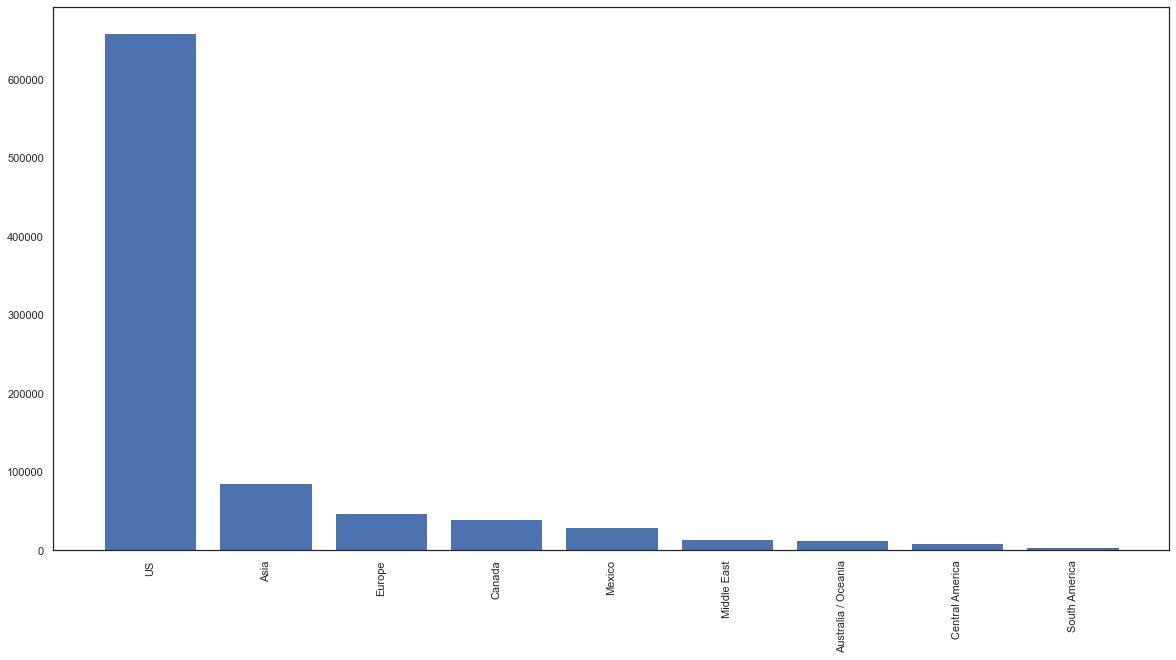

In [ ]:
reg = []
as_pas = []
for i in list(geo['GEO Region']):
    reg.append(i)
for i in list(geo['Adjusted Passenger Count']):
    as_pas.append(i)

plt.figure(figsize=(20,10))
plt.bar(reg, as_pas)
plt.xticks(rotation=90)
plt.show()

Poner todo en un csv

LIMPIEZA DE DATOS

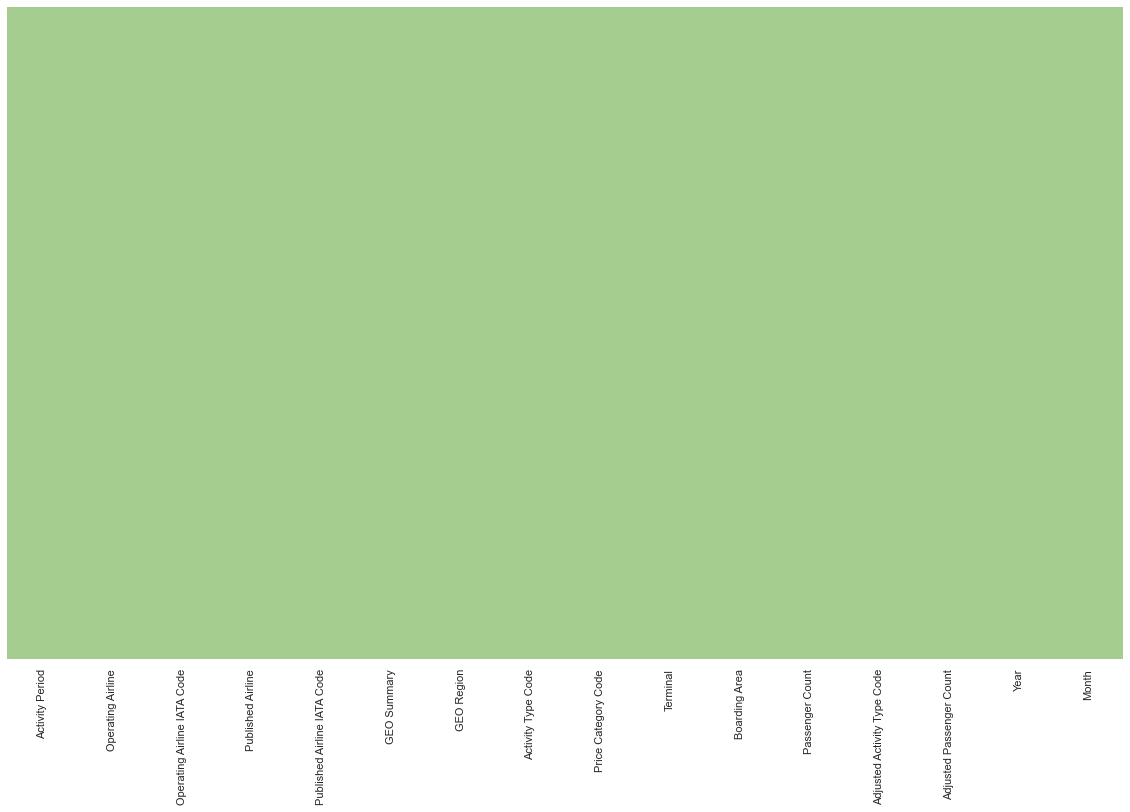

In [ ]:
#grafico que muestra los valores nulos

df_pd = df.compute()

plt.figure(figsize=(20,12))

sns.heatmap(df_pd.isna(),
            yticklabels=False,
            cmap='crest',
            cbar=False)

plt.show()


In [ ]:
#sustituir los valores nulos por unknown

df_original = df
df["Operating Airline IATA Code"] = df["Operating Airline IATA Code"].fillna("unknown")
df["Published Airline IATA Code"] = df["Published Airline IATA Code"].fillna("unknown")

In [ ]:
#resumen de los datos numericos
df.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
npartitions=1,,,,
,float64,float64,float64,float64
,...,...,...,...


ACTIVITY PERIOD, YEAR, DAY

In [ ]:
df["Activity Period"].value_counts().compute()

200807    128
200808    127
201510    126
201505    125
201603    125
         ... 
201111    110
201407    109
200602    108
201303    108
201301    107
Name: Activity Period, Length: 129, dtype: int64

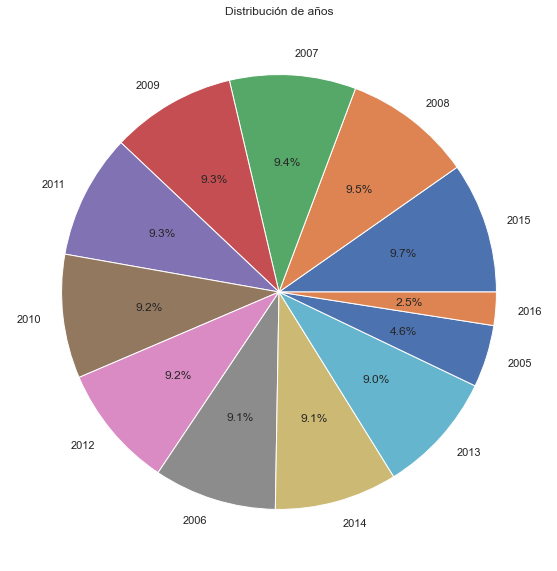

In [ ]:
year_counts = df["Year"].value_counts().compute().to_frame()

# Generar el gráfico de pastel
plt.figure(figsize=(20, 10))
plt.pie(year_counts["Year"], labels=year_counts.index, autopct="%1.1f%%")
plt.title("Distribución de años")
plt.show()

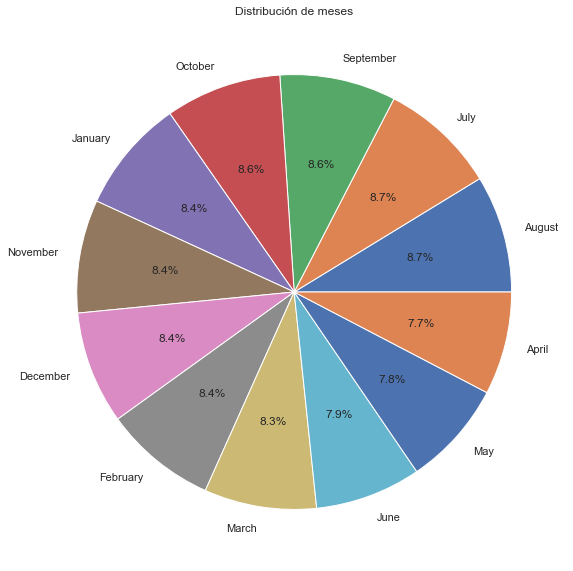

In [ ]:
#creame un grafico de los meses

month_counts = df["Month"].value_counts().compute().to_frame()

# Generar el gráfico de pastel

plt.figure(figsize=(20, 10))

plt.pie(month_counts["Month"], labels=month_counts.index, autopct="%1.1f%%")

plt.title("Distribución de meses")

plt.show()

OPERATING AIRLINE

<AxesSubplot:>

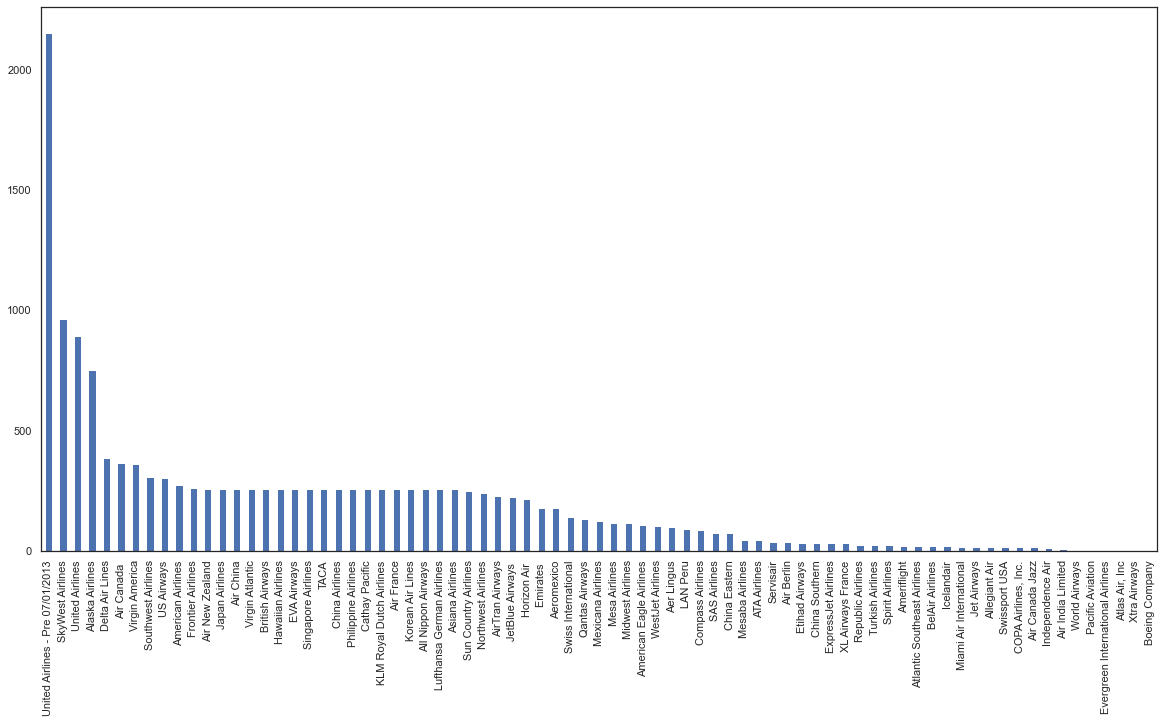

In [ ]:
#realiza un grafico con los valores de operting airline 

df["Operating Airline"].value_counts().compute().plot(kind='bar', figsize=(20,10))

In [ ]:
condicion1 = df['Operating Airline'] == 'United Airlines - Pre 07/01/2013'

df['Operating Airline'] = df['Operating Airline'].mask(condicion1, 'United Airlines')

condicion2 = df['Published Airline'] == 'United Airlines - Pre 07/01/2013'

df['Published Airline'] = df['Published Airline'].mask(condicion2, 'United Airlines')

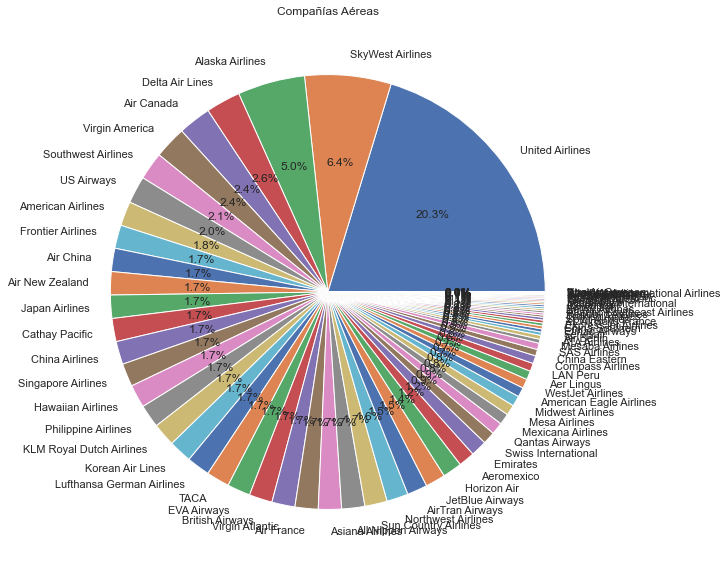

In [ ]:
month_counts = df["Operating Airline"].value_counts().compute().to_frame()

# Generar el gráfico de pastel

plt.figure(figsize=(20, 10))

plt.pie(month_counts["Operating Airline"], labels=month_counts.index, autopct="%1.1f%%")

plt.title("Compañías Aéreas")

plt.show()

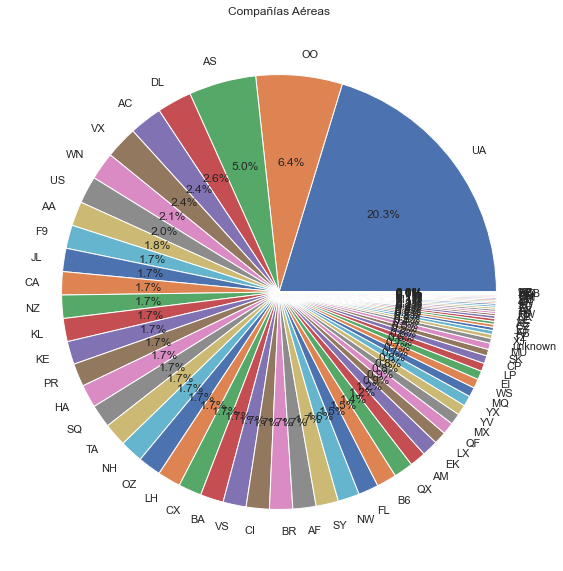

In [ ]:
month_counts = df["Operating Airline IATA Code"].value_counts().compute().to_frame()

# Generar el gráfico de pastel

plt.figure(figsize=(20, 10))

plt.pie(month_counts["Operating Airline IATA Code"], labels=month_counts.index, autopct="%1.1f%%")

plt.title("Compañías Aéreas")

plt.show()

PUBLISHED AIRLINE

<AxesSubplot:>

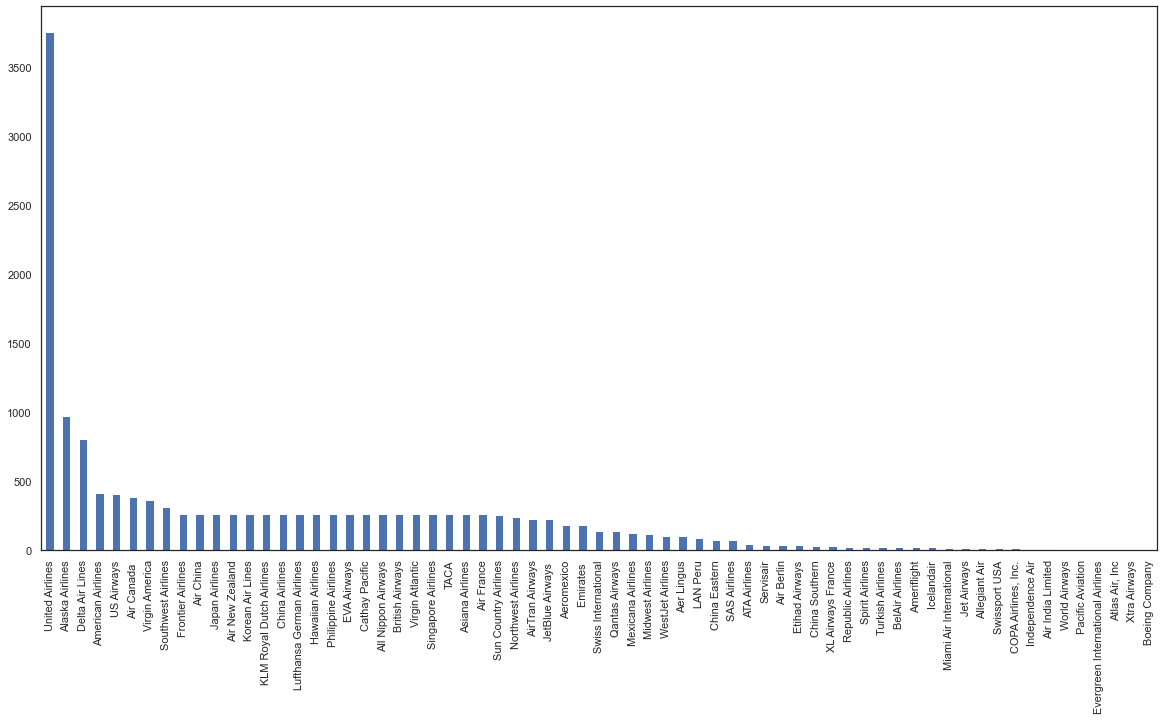

In [ ]:
df["Published Airline"].value_counts().compute().plot(kind='bar', figsize=(20,10))

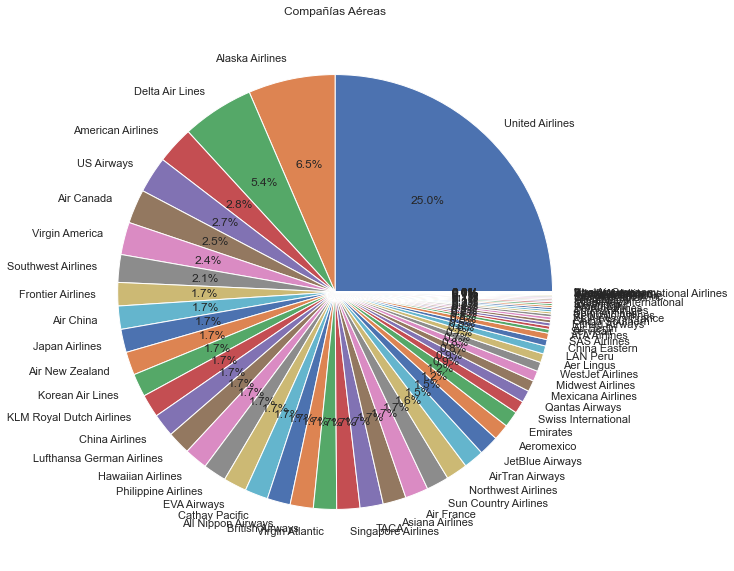

In [ ]:
month_counts = df["Published Airline"].value_counts().compute().to_frame()

# Generar el gráfico de pastel

plt.figure(figsize=(20, 10))

plt.pie(month_counts["Published Airline"], labels=month_counts.index, autopct="%1.1f%%")

plt.title("Compañías Aéreas")

plt.show()

GEO SUMMARY

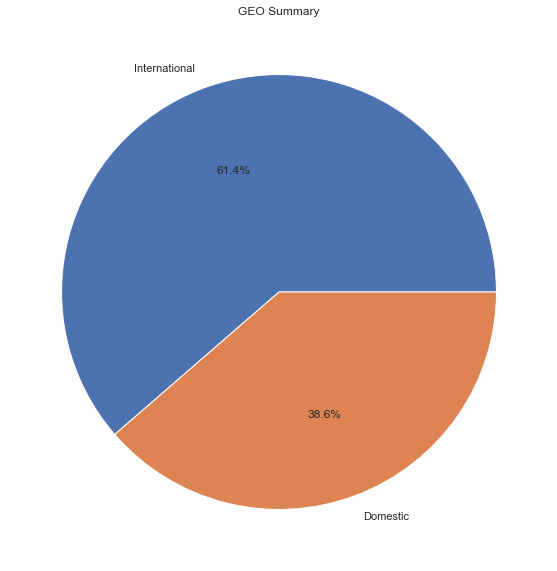

In [ ]:
month_counts = df["GEO Summary"].value_counts().compute().to_frame()

# Generar el gráfico de pastel

plt.figure(figsize=(20, 10))

plt.pie(month_counts["GEO Summary"], labels=month_counts.index, autopct="%1.1f%%")

plt.title("GEO Summary")

plt.show()

GEO REGION

In [ ]:
df["GEO Region"].value_counts().compute()

US                     5797
Asia                   3273
Europe                 2089
Canada                 1418
Mexico                 1115
Australia / Oceania     737
Central America         274
Middle East             214
South America            90
Name: GEO Region, dtype: int64

ACTIVITY TYPE CODE

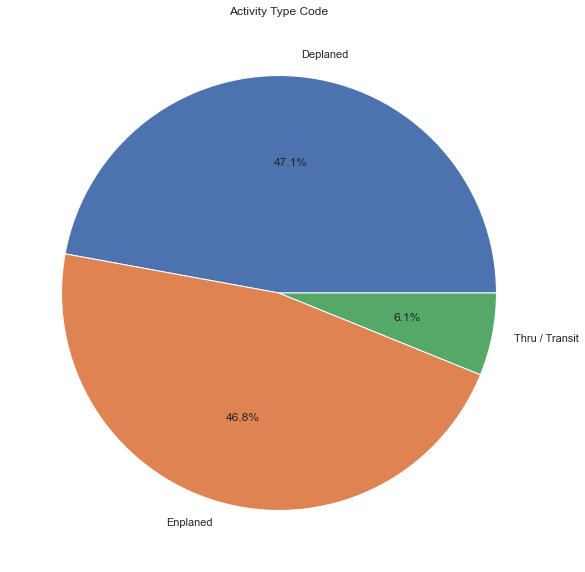

In [ ]:
grafico_pastel(df, "Activity Type Code", "Activity Type Code")

PRICE CATEGORY CODE

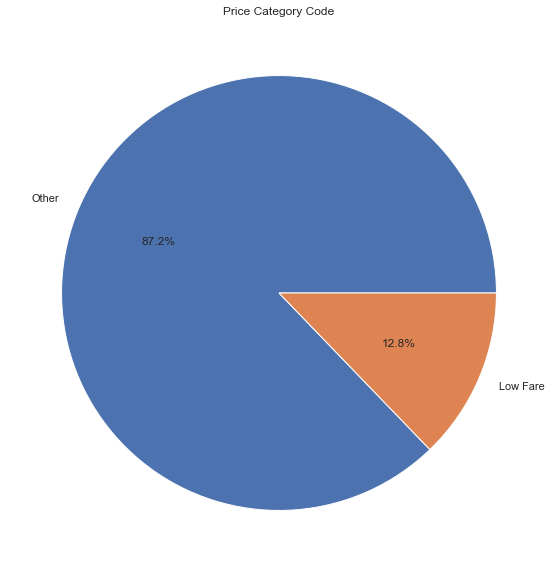

In [ ]:
grafico_pastel(df, "Price Category Code", "Price Category Code")

In [ ]:
df["Terminal"].value_counts().compute()

International    9197
Terminal 1       3241
Terminal 3       2218
Terminal 2        324
Other              27
Name: Terminal, dtype: int64

In [ ]:
df["Boarding Area"].value_counts().compute()

A        5225
G        3992
B        1993
F        1377
C        1228
E         841
D         324
Other      27
Name: Boarding Area, dtype: int64

In [ ]:
#df["Adjusted Passenger Count"].value_counts().compute().plot(kind='bar', figsize=(20,10))

CREACION COLUMNA PASAJEROS POR DIA

In [ ]:

from dask_ml.preprocessing import LabelEncoder

col_obj = ["GEO Summary"]

le = LabelEncoder()

for i in col_obj:
    df[i] = df[i].astype('str')

for i in col_obj:
    print(i)

for i in col_obj:
    df[i] = le.fit_transform(df[i])

print(df.dtypes)


GEO Summary
Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                     int64
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object


In [ ]:

from dask_ml.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

columna = le.fit_transform(df["GEO Summary"])

df["GEO Summary"] = columna

print(df["GEO Summary"])
    


Dask Series Structure:
npartitions=1
    int64
      ...
Name: GEO Summary, dtype: int64
Dask Name: getitem, 106 tasks


In [ ]:
#convertimos los objetos en numericos

obj_cols = df.select_dtypes(include='object').columns


for col in obj_cols:
    h = df.groupby(col)['Adjusted Passenger Count'].mean().compute()
    df[col] = df[col].map(h)

mean_values = df.groupby('Activity Period')['Adjusted Passenger Count'].mean().compute()

# Reemplazar la columna inicial con las medias calculadas
df['Activity Period'] = df['Activity Period'].map(mean_values)


df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,28302.582609,9661.659091,9661.659091,9661.659091,9661.659091,0,58485.878385,30966.981332,39170.889062,34014.525764,33885.257903,27271,30966.981332,27271,2005,32767.212586
1,28302.582609,9661.659091,9661.659091,9661.659091,9661.659091,0,58485.878385,31139.309436,39170.889062,34014.525764,33885.257903,29131,31139.309436,29131,2005,32767.212586
2,28302.582609,9661.659091,9661.659091,9661.659091,9661.659091,0,58485.878385,2981.695652,39170.889062,34014.525764,33885.257903,5415,2981.695652,10830,2005,32767.212586
3,28302.582609,18251.560109,18251.560109,17589.973684,17589.973684,1,9803.791255,30966.981332,27888.436846,34014.525764,33885.257903,35156,30966.981332,35156,2005,32767.212586
4,28302.582609,18251.560109,18251.560109,17589.973684,17589.973684,1,9803.791255,31139.309436,27888.436846,34014.525764,33885.257903,34090,31139.309436,34090,2005,32767.212586


<AxesSubplot:>

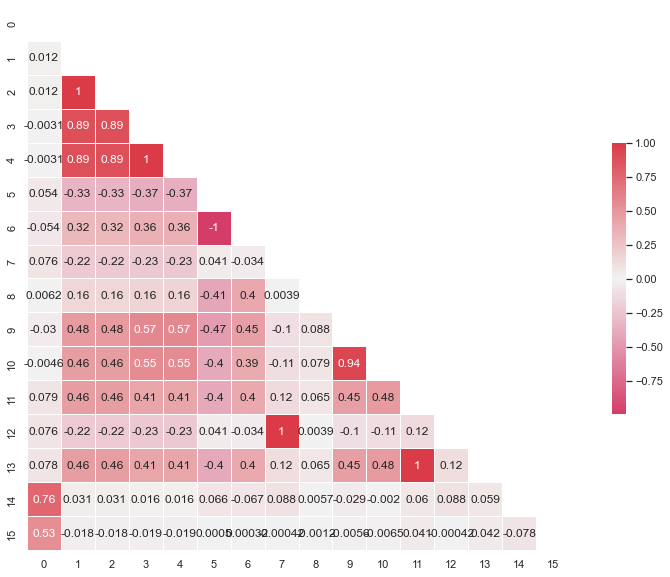

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5})

In [ ]:
#eliminar las columnas con correlacion baja en relacion a la columna adjusted passenger count

df_filtrado = df.drop(["Activity Period", "Operating Airline IATA Code", "Published Airline IATA Code", "Price Category Code", "Year", "Month"], axis=1)

In [ ]:
df_filtrado.head()

,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count
0,9661.659091,9661.659091,0,58485.878385,30966.981332,34014.525764,33885.257903,27271,30966.981332,27271
1,9661.659091,9661.659091,0,58485.878385,31139.309436,34014.525764,33885.257903,29131,31139.309436,29131
2,9661.659091,9661.659091,0,58485.878385,2981.695652,34014.525764,33885.257903,5415,2981.695652,10830
3,18251.560109,17589.973684,1,9803.791255,30966.981332,34014.525764,33885.257903,35156,30966.981332,35156
4,18251.560109,17589.973684,1,9803.791255,31139.309436,34014.525764,33885.257903,34090,31139.309436,34090


MODELOS DE REGRESION

In [ ]:
from dask_ml.datasets import make_regression
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [258]:
y = df_filtrado["Adjusted Passenger Count"]
X = df_filtrado.drop(["Adjusted Passenger Count"], axis=1)

y = y.to_dask_array(lengths=True)
X = X.to_dask_array(lengths=True)

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=222)

In [260]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

KeyboardInterrupt: 